In [35]:
import numpy as np
import os
import glob
import json 


In [67]:
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()

d = {}
db = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_corpt_1/stats_json/length_stats.json',p[i]+'/tracto_op_corpt_2/stats_json/length_stats.json']
    b = [p[i]+'/tracto_op_lr_corr_1/stats_json/length_stats.json',p[i]+'/tracto_op_lr_corr_2/stats_json/length_stats.json']
    d[i] = a
    db[i] = b

count = 0
dicts = []
Ldicts = []
maj_bun = ['AF_R','CC_Fr_1','CC_Fr_2','FAT_L','FAT_R']
filepass = []
for i in d:
    
    if os.path.exists(d[i][0]) and os.path.exists(d[i][1]) and os.path.exists(db[i][0]) and os.path.exists(db[i][1]) :
        f = open(d[i][0])
        data = json.load(f)
        mean_len = {} # make a new dict with mapping bundles and meanlength
        k = list(data.keys())[0] 
        b_key = list(data[k].keys())# get the bundles
        v = list(data[k].values())  # get the values
        for j in range(len(b_key)): 

            mean_len[b_key[j]] = v[j]['mean_length'] # assign bundle to mean length corpt 1 


        f = open(d[i][1])
        data1 = json.load(f)
        count = count + 1
        mean_len1 = {} # make a new dict with mapping bundles and meanlength

        k1 = list(data1.keys())[0] 
        b_key1 = list(data1[k1].keys())# get the bundles
        v1 = list(data1[k1].values())  # get the values
        for j in range(len(b_key1)): 

            mean_len1[b_key1[j]] = v1[j]['mean_length'] # assign bundle to mean length corpt 2 
        
        f = open(db[i][0])
        data = json.load(f)
        Lmean_len = {} # make a new dict with mapping bundles and meanlength
        k = list(data.keys())[0] 
        b_key = list(data[k].keys())# get the bundles
        v = list(data[k].values())  # get the values
        for j in range(len(b_key)): 
            Lmean_len[b_key[j]] = v[j]['mean_length'] # assign bundle to mean length corpt 1 


        f = open(db[i][1])
        data1 = json.load(f)
        Lmean_len1 = {} # make a new dict with mapping bundles and meanlength
        k1 = list(data1.keys())[0] 
        b_key1 = list(data1[k1].keys())# get the bundles
        v1 = list(data1[k1].values())  # get the values
        for j in range(len(b_key1)): 
            Lmean_len1[b_key1[j]] = v1[j]['mean_length'] # assign bundle to mean length corpt 2 

        diff = {}
        Ldiff = {}
        for key in mean_len: 
            if key in maj_bun and key in list(mean_len1.keys()) and  key in list(Lmean_len.keys()) and  key in list(Lmean_len1.keys()): #mean_len1:
                c_mean = np.nanmean([mean_len[key] , mean_len1[key]])
                c_std = np.nanstd([mean_len[key] , mean_len1[key]])
                diff[key] = (c_std / c_mean)  # cov for corpt 
                
                Lc_mean = np.nanmean([Lmean_len[key] , Lmean_len1[key]])
                Lc_std = np.nanstd([Lmean_len[key] , Lmean_len1[key]])
                Ldiff[key] = (Lc_std / Lc_mean)  # cov for corpt 
    else:
        diff = 'nan'
            
    dicts.append(diff)
    Ldicts.append(Ldiff)
import pandas as pd
elen_df = pd.DataFrame()
for i in dicts:
    if i != 'nan':
        for key in i:
            new_row = {'0': i[key], 'x':(key+'_corpt'), 'lr':'corpt'}
            elen_df = elen_df.append(new_row, ignore_index=True )
            
len_df = pd.DataFrame()
for i in Ldicts:
    if i != 'nan':
        for key in i:
            new_row = {'0': i[key], 'x':(key+'_corr'), 'lr':'corr'}
            len_df = len_df.append(new_row, ignore_index=True )

In [75]:
np.unique(elen_df['x'])

array(['AF_R_corpt', 'CC_Fr_1_corpt', 'CC_Fr_2_corpt', 'FAT_L_corpt',
       'FAT_R_corpt'], dtype=object)

In [99]:
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/'):
    p.append(path)
p.sort()
dicts = []
Ldicts = []
for i in range(len(p)):
    count = 0
    for j in os.listdir(p[i]):
        count = count + 1
        if count != 2: # only taking one session 
            a = p[i] + j + '/tracto_op_corpt_1/stats_json/volumes.json' 
            b = p[i] + j + '/tracto_op_lr_corr_1/stats_json/volumes.json' 
            if os.path.exists(a): # get the len stat file if exists
                f = open(a)
                data = json.load(f)
                mean_len = {} # make a new dict with mapping bundles and meanlength
                k = list(data.keys())[0] 
                b_key = list(data[k].keys())# get the bundles
                v = list(data[k].values())  # get the values
                for j in range(len(b_key)): 
                    mean_len[b_key[j]] = v[j]['volume'] # assign bundle to mean length
                    
                f = open(b) # correct
                data = json.load(f)
                mean_len1 = {} # make a new dict with mapping bundles and meanlength
                k = list(data.keys())[0] 
                b_key = list(data[k].keys())# get the bundles
                v = list(data[k].values())  # get the values
                for j in range(len(b_key)): 
                    mean_len1[b_key[j]] = v[j]['volume'] # assign bundle to mean length
                    
                pmean_len = {}
                pmean_len1 = {}
                for key in mean_len: 
                    if key in maj_bun and key in list(mean_len1.keys()): #mean_len1:
                        pmean_len[key] = mean_len[key]
                        pmean_len1[key] = mean_len1[key]
            else:
                print('lala')
                mean_len = 'nan'
            
            dicts.append(pmean_len)
            Ldicts.append(pmean_len1)
import pandas as pd
emn_df = pd.DataFrame()
for i in dicts:
    if i != 'nan':
        for key in i:
            #df = df.append({key: i[key]}, ignore_index=True )
            new_row = {'0': i[key], 'x':(key+'_corpt'), 'lr':'corpt'}
            emn_df = emn_df.append(new_row, ignore_index=True )
            
mn_df = pd.DataFrame()
for i in Ldicts:
    if i != 'nan':
        for key in i:
            #df = df.append({key: i[key]}, ignore_index=True )
            new_row = {'0': i[key], 'x':(key+'_corr'), 'lr':'corr'}
            mn_df = mn_df.append(new_row, ignore_index=True )

In [80]:
dicts = []
for i in range(len(p)):
    count = 0
    for j in os.listdir(p[i]):
        count = count + 1
        if count != 2: # only taking one session 
            a = p[i] + j + '/tracto_op_lr_corr_1/stats_json/volumes.json' 
            if os.path.exists(a): # get the len stat file if exists
                f = open(a)
                data = json.load(f)
                mean_len = {} # make a new dict with mapping bundles and meanlength
                k = list(data.keys())[0] 
                b_key = list(data[k].keys())# get the bundles
                v = list(data[k].values())  # get the values
                for j in range(len(b_key)): 
                    mean_len[b_key[j]] = v[j]['volume'] # assign bundle to mean length
            else:
                mean_len = 'nan'

            dicts.append(mean_len)
import pandas as pd
mn = pd.DataFrame()
for i in dicts:
    if i != 'nan':
        for key in i:
            #df = df.append({key: i[key]}, ignore_index=True )
            new_row = {'0': i[key], 'x':(key+'_corr'), 'lr':'corr'}
            mn = mn.append(new_row, ignore_index=True )

In [93]:
len(emn_df)

2226

In [76]:
cov_len  = pd.concat([elen_df,len_df])
cb = cov_len[(cov_len.x == 'AF_R_corpt')]
cc = cov_len[(cov_len.x == 'CC_Fr_1_corpt')]
cd = cov_len[(cov_len.x == 'CC_Fr_2_corpt')]
ce = cov_len[(cov_len.x == 'CC_Pr_Po_corpt')]
cf = cov_len[(cov_len.x == 'FAT_L_corpt')]
cg = cov_len[(cov_len.x == 'FAT_R_corpt')]

clb = cov_len[(cov_len.x == 'AF_R_corr')]
clc = cov_len[(cov_len.x == 'CC_Fr_1_corr')]
cld = cov_len[(cov_len.x == 'CC_Fr_2_corr')]
cle = cov_len[(cov_len.x == 'CC_Pr_Po_corr')]
clf = cov_len[(cov_len.x == 'FAT_L_corr')]
clg = cov_len[(cov_len.x == 'FAT_R_corr')]

top_cov_len = pd.concat([cb,clb,cc,clc,cd,cld,ce,cle,cf,clf,cg,clg])
AF = pd.concat([cb,clb])
diffAF = np.array(cb['0']) - np.array(clb['0'])

CC_Fr_1 = pd.concat([cc,clc])
diffCC_Fr_1 = np.array(cc['0']) - np.array(clc['0'])

CC_Fr_2 = pd.concat([cd,cld])
diffCC_Fr_2 = np.array(cd['0']) - np.array(cld['0'])

CC_Pr_Po = pd.concat([ce,cle])
diffCC_Pr_Po = np.array(ce['0']) - np.array(cle['0'])

FAT_L = pd.concat([cf,clf])
diffFAT_L = np.array(cf['0']) - np.array(clf['0'])

FAT_R = pd.concat([cg,clg])
diffFAT_R = np.array(cg['0']) - np.array(clg['0'])

array([ 5.68862425e-03, -8.51644951e-03,  3.62343180e-04, -3.12389607e-03,
       -5.30929584e-03, -2.99777511e-03,  7.03440511e-03, -2.83899493e-03,
        9.79222926e-03,  8.09878434e-04,  2.16621963e-03, -3.40802969e-03,
       -9.43910200e-04, -3.60339076e-03, -3.57863651e-03,  1.04886968e-02,
        6.47732568e-03,  3.57398476e-03,  3.58203962e-03,  2.30283642e-03,
        2.23273503e-03, -1.67220080e-03, -8.65163587e-04, -3.96928160e-03,
        2.05007871e-02, -4.88852717e-03, -1.51440821e-03,  2.12874678e-04,
        4.16559864e-03, -1.64549651e-02, -3.00699063e-03, -1.66811000e-03,
        3.33074468e-03,  1.48622387e-02,  3.46360935e-03,  9.18120166e-03,
        1.19977484e-02,  4.21177584e-03,  4.07309191e-03, -8.89391669e-03,
        6.16813704e-03, -5.38266028e-03, -5.29151515e-03, -3.05750161e-03,
       -3.98577030e-03,  5.17518041e-03, -6.88486611e-03,  3.34672066e-04,
       -1.51750013e-03, -9.86026510e-03, -2.24761353e-04,  7.71925417e-04,
       -1.16133794e-03, -

In [28]:
org_len  = pd.concat([emn_df,mn])
b = org_len[(org_len.x == 'AF_R_corpt')]
c = org_len[(org_len.x == 'CC_Fr_1_corpt')]
d = org_len[(org_len.x == 'CC_Fr_2_corpt')]
e = org_len[(org_len.x == 'CC_Pr_Po_corpt')]
f = org_len[(org_len.x == 'FAT_L_corpt')]
g = org_len[(org_len.x == 'FAT_R_corpt')]

lb = org_len[(org_len.x == 'AF_R_corr')]
lc = org_len[(org_len.x == 'CC_Fr_1_corr')]
ld = org_len[(org_len.x == 'CC_Fr_2_corr')]
le = org_len[(org_len.x == 'CC_Pr_Po_corr')]
lf = org_len[(org_len.x == 'FAT_L_corr')]
lg = org_len[(org_len.x == 'FAT_R_corr')]

top_org_len = pd.concat([b,lb,c,lc,d,ld,e,le,f,lf,g,lg])
oAF = pd.concat([b,lb])
odiffAF = np.array(b['0']) - np.array(lb['0'])

oCC_Fr_1 = pd.concat([c,lc])
odiffCC_Fr_1 = np.array(c['0']) - np.array(lc['0'])

oCC_Fr_2 = pd.concat([d,ld])
odiffCC_Fr_2 = np.array(d['0']) - np.array(ld['0'])

oCC_Pr_Po = pd.concat([e,le])
odiffCC_Pr_Po = np.array(e['0']) - np.array(le['0'])

oFAT_L = pd.concat([f,lf])
odiffFAT_L = np.array(f['0']) - np.array(lf['0'])

oFAT_R = pd.concat([g,lg])
odiffFAT_R = np.array(g['0']) - np.array(lg['0'])

ValueError: operands could not be broadcast together with shapes (60,) (59,) 

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlim'

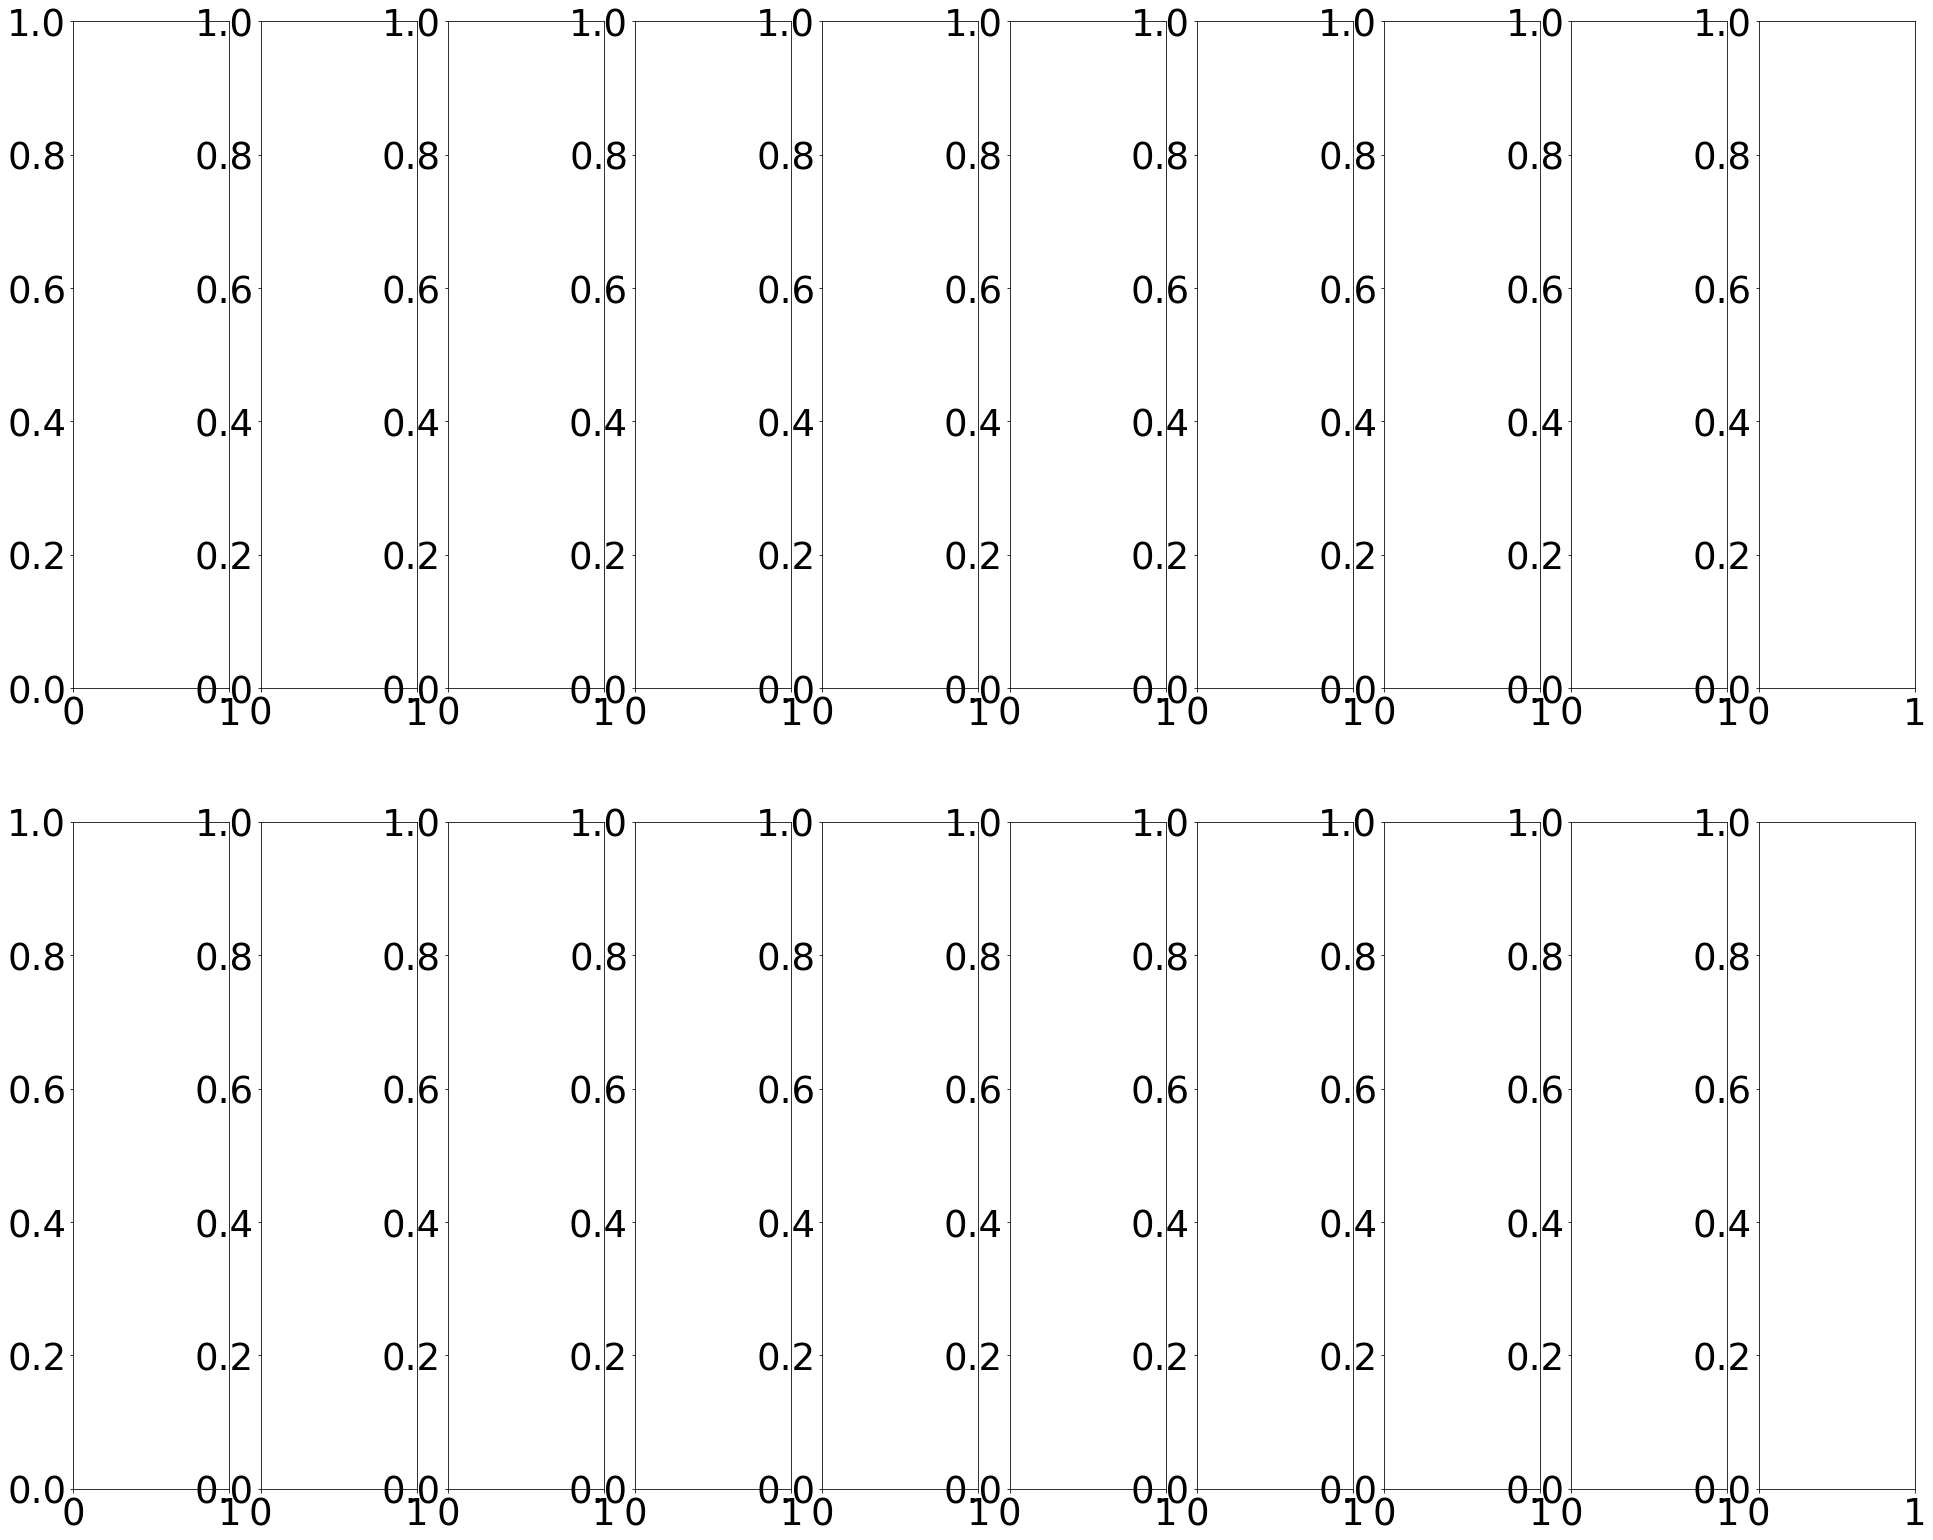

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,10, figsize=(33,27)) # gridspec_kw = {'width_ratios': [1,0.5,0.5]})

flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
palette= {'corpt': 'crimson','corr': 'cornflowerblue'}

#box_plot = sns.swarmplot(ax = axes[0,0], x="x",y=0,data=Cdfmod,flierprops=flierprops, width=0.4 , palette=palette)#, labels=["Without L(r) Correction","With L(r) Correction"])
box_plot = sns.swarmplot(ax = axes[0], x="x",y='0',data=AF,hue='lr',palette=palette, size=10)#, labels=["Without L(r) Correction","With L(r) Correction"])
axes[0].set_title('Mean length', fontsize=45, pad=15)
axes[0].set_ylabel('CoV',fontsize = 42)
# axes[0].set_xlabel(' ')
# axes[0].tick_params(bottom=False)
# axes[0].grid(True,linewidth=0.5)
# axes[0].set_xticklabels([])
idx0 = 0
idx1 = 1
locs1 = axes[0].get_children()[idx0].get_offsets()
locs2 = axes[0].get_children()[idx1].get_offsets()
# cb,clb,cc,clc,cd,cld,ce,cle,cf,clf,cg,clg
# before plotting, we need to sort so that the data points
# correspond to each other as they did in "set1" and "set2"
sort_idxs1 = np.argsort(cb['0'].tolist())
sort_idxs2 = np.argsort(clb['0'].tolist())

# revert "ascending sort" through sort_idxs2.argsort(),
# and then sort into order corresponding with set1
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
sns.violinplot(ax=axes[0,0],data=diff_cov_,color='lightslategray',width=0.5)

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    axes[0].plot(x, y, color="black", alpha=0.5)


sort_idxs1 = np.argsort(cb['0'].tolist())
sort_idxs2 = np.argsort(clb['0'].tolist())

locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    axes[0].plot(x, y, color="black", alpha=0.5)
    

sns.swarmplot(ax = axes[1],x="x",y='0',data=top_org_len, hue='lr',palette=palette,size=10)
axes[1].set_title(' ', fontsize=45, pad=15)
axes[1].set_ylabel('Mean length',fontsize = 42)
axes[1].set_xticklabels([])
axes[1].set_xlabel(' ')
# axes[1].tick_params(bottom=False)
# axes[1].grid(True,linewidth=0.5)

# idx0 = 0
# idx1 = 1
# locs1 = axes[1].get_children()[idx0].get_offsets()
# locs2 = axes[1].get_children()[idx1].get_offsets()
# sort_idxs1 = np.argsort(emn_df['0'].tolist())
# sort_idxs2 = np.argsort(mn_df['0'].tolist())
# locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
# for i in range(locs1.shape[0]):
#     x = [locs1[i, 0], locs2_sorted[i, 0]]
#     y = [locs1[i, 1], locs2_sorted[i, 1]]
#     axes[1].plot(x, y, color="black", alpha=0.5)  


    
plt.rcParams.update({'font.size':37})
plt.subplots_adjust(wspace=0.32,hspace=0.1)


plt.savefig('fig45.png')

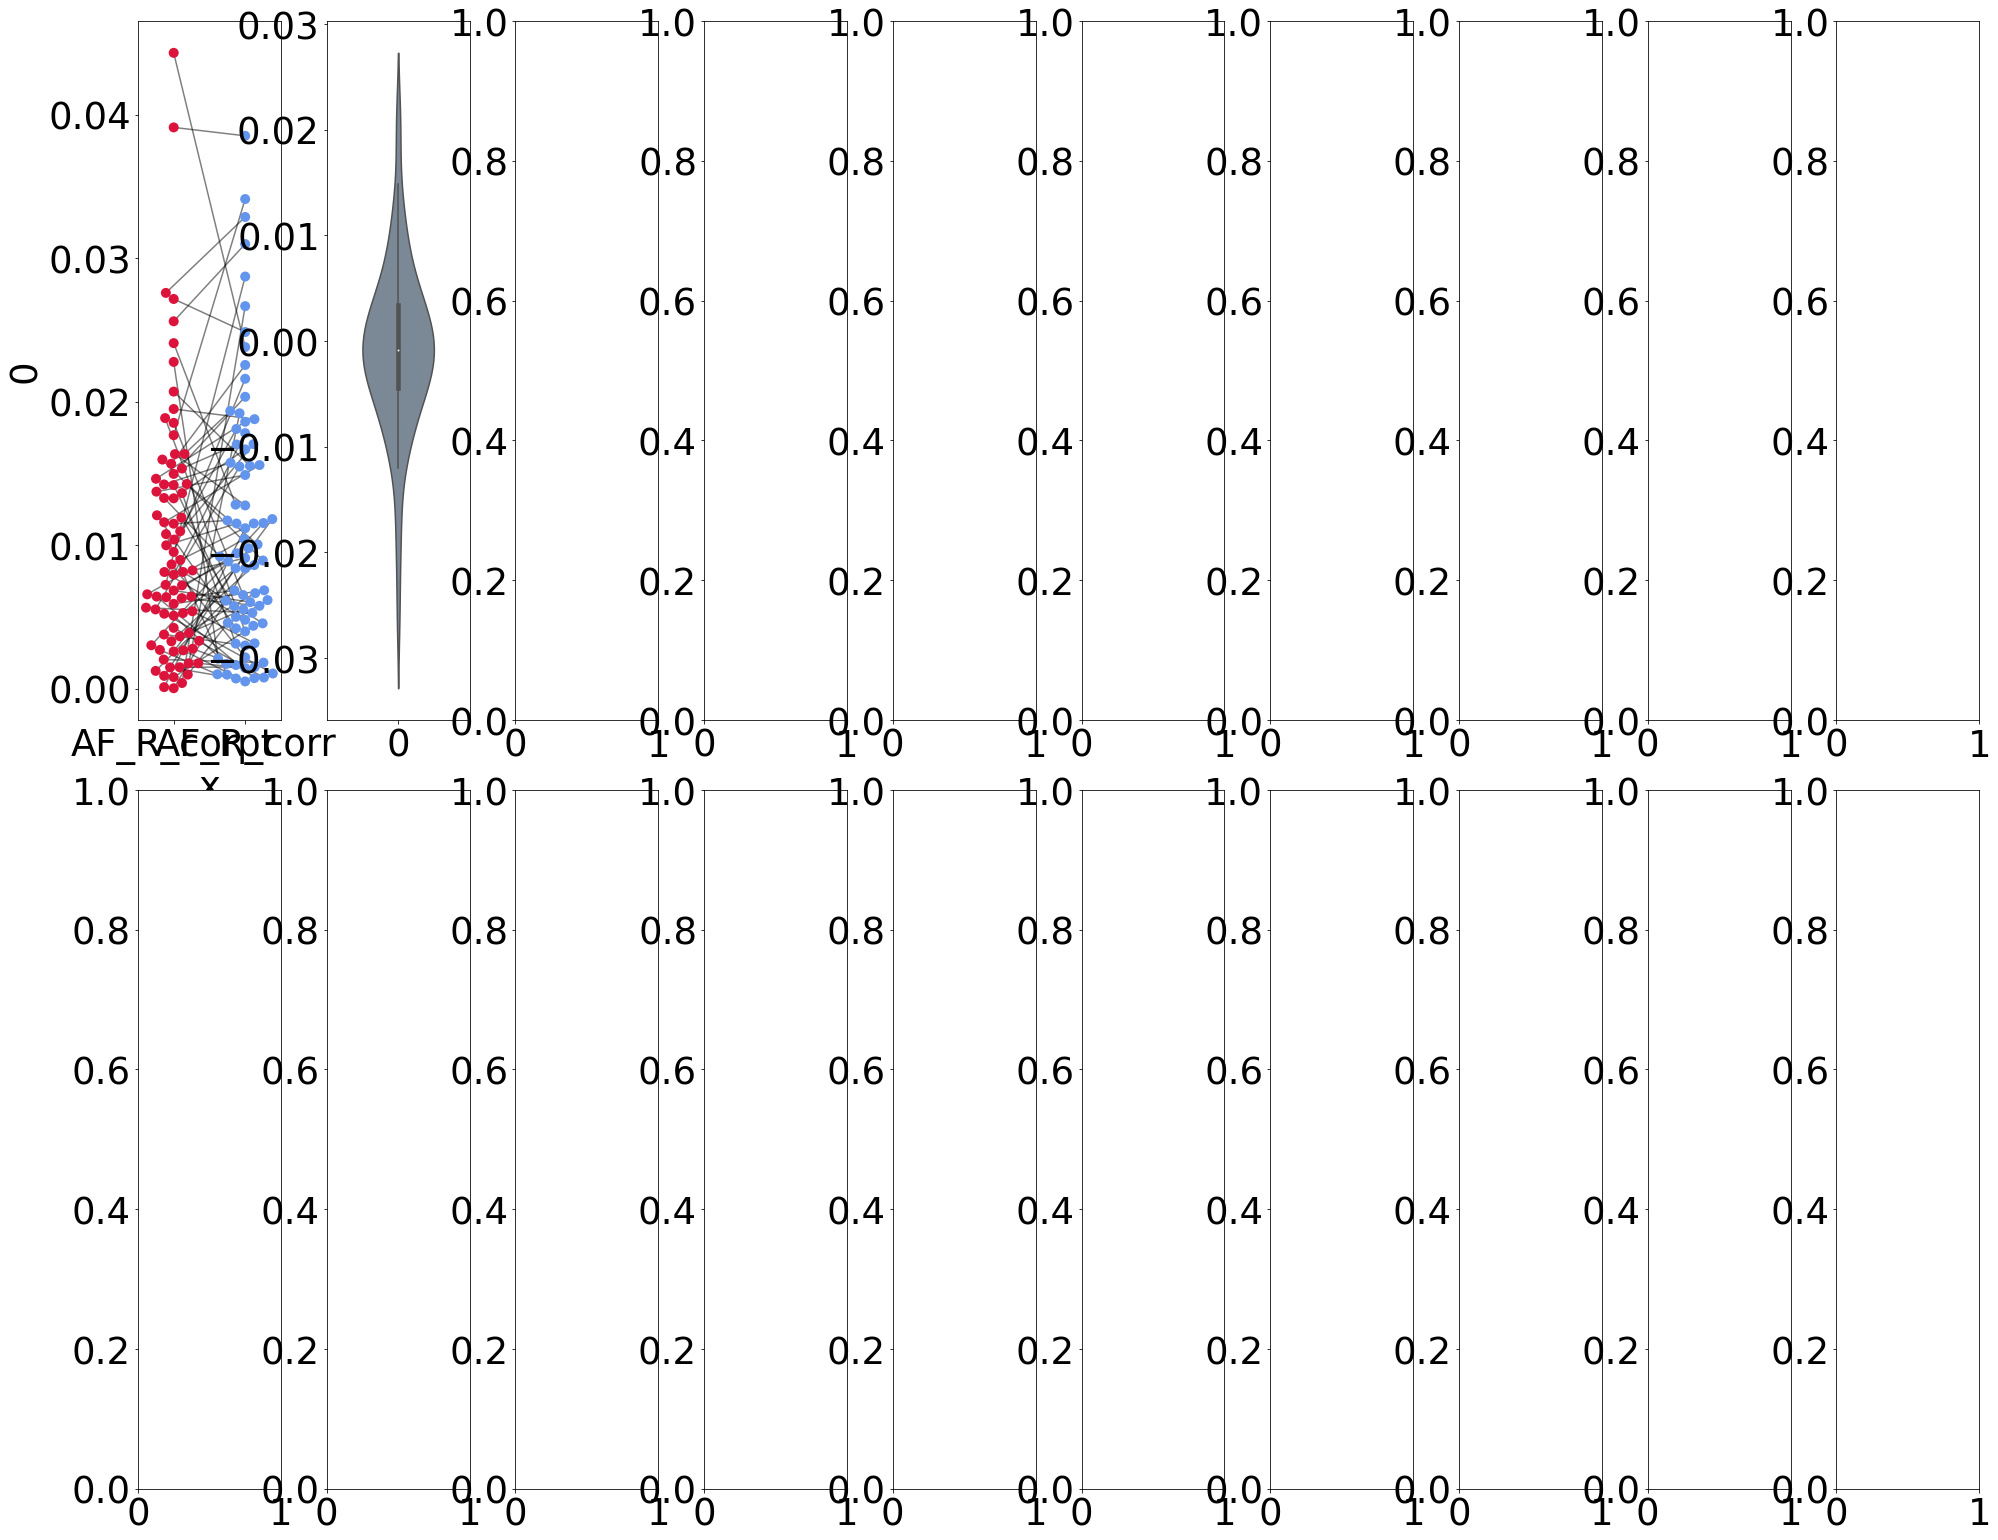

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,10, figsize=(33,27)) # gridspec_kw = {'width_ratios': [1,0.5,0.5]})

flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
palette= {'corpt': 'crimson','corr': 'cornflowerblue'}

#box_plot = sns.swarmplot(ax = axes[0,0], x="x",y=0,data=Cdfmod,flierprops=flierprops, width=0.4 , palette=palette)#, labels=["Without L(r) Correction","With L(r) Correction"])
box_plot = sns.swarmplot(ax = axes[0,0], x="x",y='0',data=AF,hue='lr',palette=palette, size=10)#, labels=["Without L(r) Correction","With L(r) Correction"])
axes[0,0].legend([],[],frameon=False)
# axes[0,0].set_title('Mean length', fontsize=45, pad=15)
# axes[0,0].set_ylabel('CoV',fontsize = 42)
# axes[0].set_xlabel(' ')
# axes[0].tick_params(bottom=False)
# axes[0].grid(True,linewidth=0.5)
# axes[0].set_xticklabels([])
idx0 = 0
idx1 = 1
locs1 = axes[0,0].get_children()[idx0].get_offsets()
locs2 = axes[0,0].get_children()[idx1].get_offsets()
sort_idxs1 = np.argsort(cb['0'].tolist())
sort_idxs2 = np.argsort(clb['0'].tolist())
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2_sorted[i, 0]]
    y = [locs1[i, 1], locs2_sorted[i, 1]]
    axes[0,0].plot(x, y, color="black", alpha=0.5)

sns.violinplot(ax=axes[0,1],data=diffAF,color='lightslategray',width=0.5)

    
plt.rcParams.update({'font.size':37})
plt.subplots_adjust(wspace=0.32,hspace=0.1)


plt.savefig('fig45.png')